# Lesson 3: Demos


## Normality Demo
http://hamelg.blogspot.com/2015/11/python-for-data-analysis-part-21.html

In [2]:
#General imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

### Skewness and Kurtosis
*Skewness* measures the **skew or asymmetry of a distribution** while *Kurtosis* measures the **"peakedness" of a distribution**. 

We won't go into the exact calculations behind these, but they are essentially just statistics that take the idea of variance a step further: while variance involves squaring deviations from the mean, skewness involves cubing deviations from the mean, and kurtosis involves raising deviations from the mean to the 4th power.

Pandas has built in functions for checking skewness and kurtosis, df.skew() and df.kurt() respectively:

In [3]:
norm_data = np.random.normal(size=100000)
skewed_data = np.concatenate((np.random.normal(size=35000)+2, 
                             np.random.exponential(size=65000)), 
                             axis=0)
uniform_data = np.random.uniform(0,2, size=100000)
peaked_data = np.concatenate((np.random.exponential(size=50000),
                             np.random.exponential(size=50000)*(-1)),
                             axis=0)

data_df = pd.DataFrame({"norm":norm_data,
                       "skewed":skewed_data,
                       "uniform":uniform_data,
                       "peaked":peaked_data})

## Types of distributions

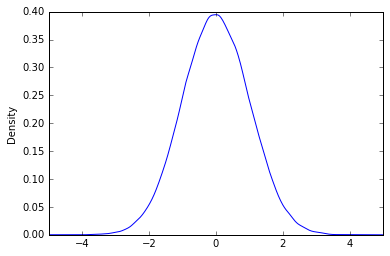

In [4]:
data_df["norm"].plot(kind="density", xlim=(-5,5))

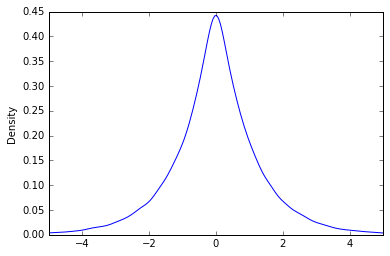

In [5]:
data_df["peaked"].plot(kind="density", xlim=(-5,5))

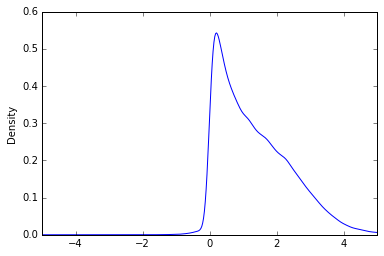

In [6]:
data_df["skewed"].plot(kind="density", xlim=(-5,5))

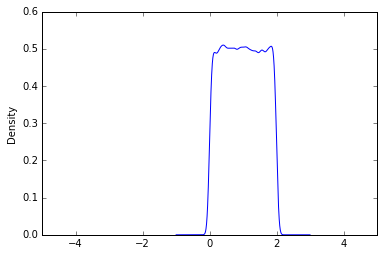

In [7]:
data_df["uniform"].plot(kind="density", xlim=(-5,5))

### All together

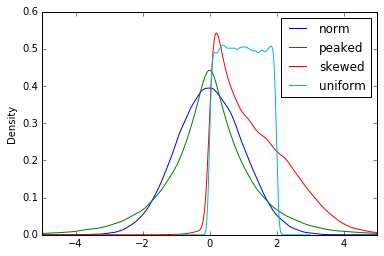

In [8]:
data_df.plot(kind="density",
            xlim=(-5,5))

### Skewness

Now let's check the skewness of each of these distributions. 

Since skewness measures asymmetry, we'd expect to see low skewness for all of the distributions except the skewed one, because all the others are roughly symmetric:

In [9]:
data_df.skew()

norm       0.009477
peaked     0.014929
skewed     1.031290
uniform    0.005572
dtype: float64

### Kurtosis

Now let's check kurtosis. Since kurtosis measures peakedness, we'd expect the flat (uniform) distribution to have low kurtosis while the distributions with sharper peaks should have higher kurtosis.

In [10]:
data_df.kurt()

norm      -0.021544
peaked     3.047936
skewed     1.438448
uniform   -1.198086
dtype: float64

As we can see from the output, the normally distributed data has a kurtosis near zero, the flat distribution has negative kurtosis, and the two pointier distributions have positive kurtosis.

## Class Variable Demo

### Class/Dummy Variables
We want to represent categorical variables numerically, but we can't simply code them as 0=rural, 1=suburban, 2=urban because that would imply an **ordered relationship** between suburban and urban (suggesting that urban is somehow "twice" the suburban category, which doesn't make sense).

Why do we only need **two dummy variables, not three?** Because two dummies capture all of the information about the Area feature, and implicitly defines rural as the reference level.

In general, if you have a categorical feature with k levels, you create k-1 dummy variables.


#### Create three dummy variables using get_dummies, then exclude the first dummy column
my_categorical_var_dummies = pd.get_dummies(my_categorical_var, prefix='Area').iloc[:, 1:]

In [12]:
# read data into a DataFrame
data = pd.read_csv('http://www-bcf.usc.edu/~gareth/ISL/Advertising.csv', index_col=0)
data.head()

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


### Handling Categorical Predictors with Two Categories

Up to now, all of our predictors have been numeric. What if one of our predictors was categorical?

Let's create a new feature called "Size," and randomly assign observations to be small or large:

In [13]:
# set a seed for reproducibility
np.random.seed(12345)

# create a Series of booleans in which roughly half are True
nums = np.random.rand(len(data))
mask_large = nums > 0.5

# initially set Size to small, then change roughly half to be large
data['Size'] = 'small'
data.loc[mask_large, 'Size'] = 'large'
data.Size[mask_large]='large'
data.head()

/Users/srikanajan/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,TV,Radio,Newspaper,Sales,Size
1,230.1,37.8,69.2,22.1,large
2,44.5,39.3,45.1,10.4,small
3,17.2,45.9,69.3,9.3,small
4,151.5,41.3,58.5,18.5,small
5,180.8,10.8,58.4,12.9,large


In [14]:
data.Size.value_counts()

large    108
small     92
Name: Size, dtype: int64

For scikit-learn, we need to represent all data numerically. 

If the feature only has two categories, we can simply create a dummy variable that represents the categories as a binary value.

In [48]:
# create a new Series called IsLarge
data['IsLarge'] = data.Size.map({'small':0, 'large':1})
data.head()

,TV,Radio,Newspaper,Sales,Size,IsLarge
1,230.1,37.8,69.2,22.1,large,1
2,44.5,39.3,45.1,10.4,small,0
3,17.2,45.9,69.3,9.3,small,0
4,151.5,41.3,58.5,18.5,small,0
5,180.8,10.8,58.4,12.9,large,1


### Handling Categorical Predictors with More than Two Categories

Let's create a new feature called Area, and randomly assign observations to be rural, suburban, or urban:

In [15]:
# set a seed for reproducibility
np.random.seed(123456)

# assign roughly one third of observations to each group
nums = np.random.rand(len(data))
mask_suburban = (nums > 0.33) & (nums < 0.66)
mask_urban = nums > 0.66
data['Area'] = 'rural'
data.loc[mask_suburban, 'Area'] = 'suburban'
data.loc[mask_urban, 'Area'] = 'urban'
data.head()

,TV,Radio,Newspaper,Sales,Size,Area
1,230.1,37.8,69.2,22.1,large,rural
2,44.5,39.3,45.1,10.4,small,urban
3,17.2,45.9,69.3,9.3,small,rural
4,151.5,41.3,58.5,18.5,small,urban
5,180.8,10.8,58.4,12.9,large,suburban


In [16]:
data.Area.unique()

array(['rural', 'urban', 'suburban'], dtype=object)

We have to represent Area numerically, but we can't simply code it as 0=rural, 1=suburban, 2=urban because that would imply an ordered relationship between suburban and urban (and thus urban is somehow "twice" the suburban category).

Instead, we create another dummy variable:

In [54]:
# create three dummy variables using get_dummies, then exclude the first dummy column
area_dummies = pd.get_dummies(data.Area, prefix='Area').iloc[:, 1:]

# concatenate the dummy variable columns onto the original DataFrame (axis=0 means rows, axis=1 means columns)
data = pd.concat([data, area_dummies], axis=1)
data.head()

,TV,Radio,Newspaper,Sales,Size,IsLarge,Area,Area_suburban,Area_urban,suburban,urban,Area_suburban,Area_urban
1,230.1,37.8,69.2,22.1,large,1,rural,0.0,0.0,0.0,0.0,0.0,0.0
2,44.5,39.3,45.1,10.4,small,0,urban,0.0,1.0,0.0,1.0,0.0,1.0
3,17.2,45.9,69.3,9.3,small,0,rural,0.0,0.0,0.0,0.0,0.0,0.0
4,151.5,41.3,58.5,18.5,small,0,urban,0.0,1.0,0.0,1.0,0.0,1.0
5,180.8,10.8,58.4,12.9,large,1,suburban,1.0,0.0,1.0,0.0,1.0,0.0
